<font color='LightSkyBlue'>
<font size=6>
        
**CNN with PyTorch**

<font color = 'MediumVioletRed'>
<font size = 5>
INSTALACIÓN

<font color = 'AntiqueWhite'>
<font size = 3>
Para instalar PyTorch en Manjaro, lo hacemos como se indica en la web oficial de <a href=https://pytorch.org//>PyTorch</a>. Teniendo en cuenta que ya estaba previamente instalado Anaconda.

In [120]:
# Verificamos la instalación
import torch
epsilon = torch.rand(5, 3)
print(epsilon)

tensor([[0.5961, 0.8758, 0.6806],
        [0.2087, 0.6179, 0.1850],
        [0.2598, 0.0911, 0.3489],
        [0.3676, 0.9557, 0.9244],
        [0.2313, 0.2514, 0.5735]])


In [121]:
# Verificamos if GPU is enable and accessible by PyTorch
torch.cuda.is_available()

True

In [122]:
# Se listan los paquetes instalados en el entorno virtual
!pip list

Package                   Version
------------------------- --------------
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.2
executing                 2.1.0
fastjsonschema            2.20.0
filelock                  3.13.1
fonttools                 4.54.1
fqdn                      1.5.1
gmpy2                     2.1.2
h11                       0.14.0
httpcore

In [123]:
# Importamos las librerias que vamos a usar
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
# Convertimos las imágenes a tensores 4D (# of images, Height, Width, Color channel)
transform = transforms.ToTensor()

In [125]:
# Train Data
train_data = datasets.MNIST(root='pathlib.Path', train = True, download = True, transform = transform)

In [126]:
# Test Data
test_data = datasets.MNIST(root = 'pathlib.Path', train = False, download = True, transform = transform)

In [127]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: pathlib.Path
    Split: Train
    StandardTransform
Transform: ToTensor()

In [128]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: pathlib.Path
    Split: Test
    StandardTransform
Transform: ToTensor()

In [129]:
pwd

'/home/zick13/Documentos/Developer/Projects/learn_pytorch'

In [130]:
ls

01_fundamentals.ipynb                       pathlib.Path/
convolutional_neural_network_pytorch.ipynb  simple_iris_model.pt
neural_network_iris_pytorch.ipynb


In [131]:
# Crete a small batch size for images
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True) # lote de 10 imagenes y mezclar (barajear) = true
test_loader = DataLoader(train_data, batch_size = 10, shuffle = False) # lote de 10 imagenes y mezclar (barajear) = False

<font color = 'DeepPink'>
<font size = 5>
CNN MODEL

In [132]:
# Define our CNN model
# Describe convolutional layer and what it's doing (2 convolutional layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [133]:
# Grab 1 MNIST record/image
for i, (X_Train, y_train) in enumerate (train_data):
    break

In [134]:
X_Train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [135]:
X_Train.shape # devuelve una tupla (1, 28, 28). La imagen es de 1 canal (escala de grises), 28 pixeles de alto, 28 pixeles de ancho

torch.Size([1, 28, 28])

In [136]:
y_train

5

In [137]:
x = X_Train.view(1, 1, 28, 28) # cambia la forma (shape) del tensor sin modificar sus datos subyacentes. 
# 1: primera dimension, indica el tamano del bacth, procesa solo una imagen; 1: segunda dimension, relaciona el canal, escala de grises
# 28: tercera dimension, representa el alto de la img
# 28: cuarta dimension, representa el ancho de la img

In [138]:
# Perform our first convolution
x = F.relu(conv1(x)) # rectified linear unit for our activation function

In [139]:
# 1 single image, 6 is the filters we asked for, 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [140]:
# Pass thru the pooling layer
x = F.max_pool2d(x, 2, 2) # kernel of 2 and 2 stride of 2

In [141]:
x.shape # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [142]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [143]:
x.shape # again, we didn't set padding so we lose 2 pixels around the outside of the image

torch.Size([1, 16, 11, 11])

In [144]:
# Pooling layer
x = F.max_pool2d(x, 2, 2)

In [145]:
x.shape # 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [146]:
# Operaciones de lo que esta sucediendo
(((28 - 2) / 2) - 2) / 2

5.5

<font color = 'DeepPink'>
<font size = 5>
CONVOLUTIONA NEURAL NETWORK

In [147]:
# Modelo de Red Convolucional
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        # Capas Completamente Conectadas
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)  # Kernel 2x2 y salto de 2
        # Segunda Capa Convolucional
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)  # Kernel 2x2 y salto de 2

        # Aplanamiento de los datos para pasarlos a las capas completamente conectadas
        X = X.view(-1, 16 * 5 * 5)  # -1 ajusta el tamaño del batch automáticamente

        # Capas Completamente Conectadas
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


In [148]:
# Create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [149]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)# smaller the learning rate, longer its take to traing

In [150]:
import time # importa la librería time y almacena el tiempo de inicio
start_time = time.time() # se usa este valor para calcular el tiempo total de entrenamiento


# Create Variables To Tracks Things
epochs = 5 # número de veces que el modelo pasará por el conjunto de datos completo.
train_losses = [] # listas para almacenar las pérdidas de entrenamiento y prueba en cada época.
test_losses = [] # listas para almacenar las pérdidas de entrenamiento y prueba en cada época.
train_correct = [] # listas para almacenar la cantidad de predicciones correctas en el entrenamiento.
test_correct = [] # listas para almacenar la cantidad de predicciones correctas en la prueba.


# For Loop of Epochs
for i in range(epochs): # recorre cada época, controlando cuántas veces entrenaremos al modelo.
    # Las variables trn_corr y tst_corr se inicializan en cada época para contar las predicciones correctas en el conjunto de entrenamiento y prueba.
    trn_corr = 0 
    tst_corr = 0
    
    
    # Train
    # Este bucle recorre los lotes (grupos de datos) en el conjunto de entrenamiento (train_loader).
    for b,(X_train, y_train) in enumerate(train_loader): # representan los datos de entrada y las etiquetas de salida (clases correctas).
        b+=1 # start our batches at 1, b: cuenta el número de lotes en cada época.
        y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D. Usa el modelo para predecir las etiquetas.
        loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train. Calcula la "pérdida", que indica qué tan lejos está la predicción del modelo de la respuesta correcta.
        predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point. Encuentra las clases con la probabilidad más alta (predicción del modelo).
        batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up. Calcula cuántas predicciones en este lote coinciden con las etiquetas verdaderas.

        trn_corr += batch_corr # keep track as we go along in training. Acumula las predicciones correctas para la época actual.
        
        # Update our parameters
        optimizer.zero_grad() # limpia los gradientes acumulados.
        loss.backward()  # calcula los gradientes para los parámetros del modelo.
        optimizer.step() # ajusta los pesos del modelo para minimizar la pérdida.
        
        # Print out some results
        # Cada 600 lotes imprime la época, el lote y la pérdida actual para dar una idea de cómo está yendo el entrenamiento.
        if b%600 == 0: 
            print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')
            
            
    # Guarda la pérdida final y las predicciones correctas de cada época.
    train_losses.append(loss) 
    train_correct.append(trn_corr)
    

    # Test
    with torch.no_grad(): #No gradient so we don't update our weights and biases with test data. Desactiva la acumulación de gradientes para que el modelo no se ajuste con los datos de prueba.
        for b,(X_test, y_test) in enumerate(test_loader):
          y_val = model(X_test)
          predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
          tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away. Acumula las predicciones correctas en el conjunto de prueba.


    loss = criterion(y_val, y_test) # calcula la pérdida en el conjunto de prueba.
    # Guarda la pérdida y la precisión de las predicciones correctas.
    test_losses.append(loss)
    test_correct.append(tst_corr)


# Calcula y muestra el tiempo total de entrenamiento. Divide por 60 para mostrarlo en minutos.
current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.16236118972301483
Epoch: 0  Batch: 1200  Loss: 0.16026633977890015
Epoch: 0  Batch: 1800  Loss: 0.4948977530002594
Epoch: 0  Batch: 2400  Loss: 0.13675883412361145
Epoch: 0  Batch: 3000  Loss: 0.006559014320373535
Epoch: 0  Batch: 3600  Loss: 0.4029088616371155
Epoch: 0  Batch: 4200  Loss: 0.0036026432644575834
Epoch: 0  Batch: 4800  Loss: 0.001556448987685144
Epoch: 0  Batch: 5400  Loss: 0.064739890396595
Epoch: 0  Batch: 6000  Loss: 0.00042972349910996854
Epoch: 1  Batch: 600  Loss: 0.0043874094262719154
Epoch: 1  Batch: 1200  Loss: 0.256259024143219
Epoch: 1  Batch: 1800  Loss: 0.002068303059786558
Epoch: 1  Batch: 2400  Loss: 0.0024301696103066206
Epoch: 1  Batch: 3000  Loss: 0.016485152766108513
Epoch: 1  Batch: 3600  Loss: 0.37726518511772156
Epoch: 1  Batch: 4200  Loss: 0.024401243776082993
Epoch: 1  Batch: 4800  Loss: 0.00025369125069119036
Epoch: 1  Batch: 5400  Loss: 0.0003815552045125514
Epoch: 1  Batch: 6000  Loss: 0.2425556480884552
Epoch: 2  

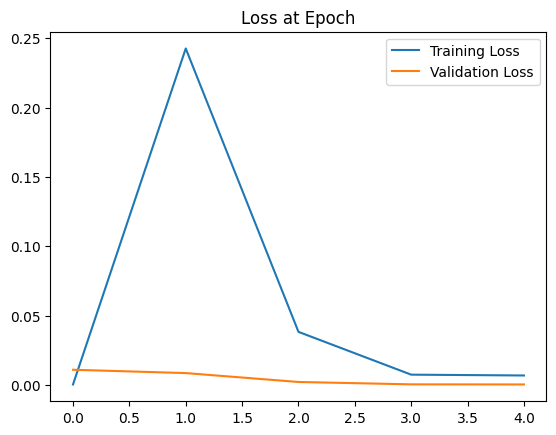

In [151]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses] # es un comprehension de lista que convierte cada elemento de train_losses a un número escalar con .item().
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

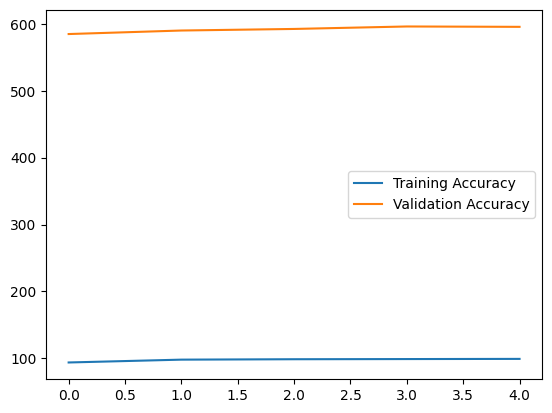

In [152]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy") # esta línea genera la gráfica de precisión en el conjunto de entrenamiento (Training Accuracy).
plt.plot([t/100 for t in test_correct], label="Validation Accuracy") # esta línea gráfica la precisión en el conjunto de validación (Validation Accuracy).
plt.legend()

In [153]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [154]:
with torch.no_grad(): # desactiva el cálculo de gradientes. Se usa aquí para evaluar el modelo sin actualizar los parámetros (pesos y sesgos),
    correct = 0 # inicializa una variable correct para llevar la cuenta del número total de predicciones correctas que el modelo hace en el conjunto de prueba

    # Inicia un bucle for que recorre los datos de prueba (X_test son las características y y_test son las etiquetas correspondientes).
    for X_test, y_test in test_load_everything: # representa un "data loader" que devuelve lotes de datos de prueba, lo que permite evaluar en bloques de datos en lugar de todos de una vez.
        y_val = model(X_test) # pasa el lote de datos de entrada (X_test) al modelo para obtener las predicciones (y_val),
        predicted = torch.max(y_val, 1)[1] # calcula el valor máximo a lo largo de la dimensión 1 (la de las clases en la salida) en y_val. Esto devuelve tanto el valor máximo como su índice (posición) en cada fila (muestra).
        # [1] selecciona el índice de la clase con el valor más alto para cada muestra en y_val, lo que corresponde a la predicción de clase del modelo para cada dato en X_test.
        correct += (predicted == y_test).sum() # crea un tensor booleano en el que cada elemento es True si la predicción (predicted)
# (predicted == y_test).sum() convierte este tensor en el número de aciertos, sumando 1 por cada True.
# correct += agrega este número al total de predicciones correctas (correct).

In [155]:
# Calcula el porcentaje de precisión del modelo en el conjunto de datos de prueba.
correct.item()/len(test_data)*100

98.64

In [157]:
# Toma la imagen número 4143 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[4143] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [158]:
# Toma la imagen número 4146 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[4146] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [159]:
# Toma la imagen número 4143 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [156]:
# Toma la imagen número 1978 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[1978] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [160]:
# Reorganiza el tensor de la imagen en una matriz de tamaño 28x28 para que sea más fácil de visualizar o manipular.
test_data[4143][0].reshape(28, 28) # [0] es la primera parte de la tupla, que contiene el tensor de la imagen.

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [161]:
# Reorganiza el tensor de la imagen en una matriz de tamaño 28x28 para que sea más fácil de visualizar o manipular.
test_data[1978][0].reshape(28, 28) # [0] es la primera parte de la tupla, que contiene el tensor de la imagen.

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

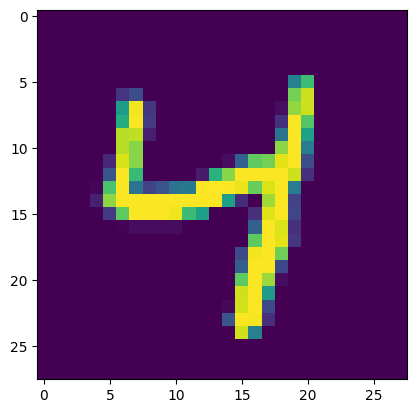

In [164]:
# Show the image 
plt.imshow(test_data[1978][0].reshape(28, 28))

In [165]:
# Pass de image thru our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[1978][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [166]:
# Check the prediction ... get probabilities
new_prediction

tensor([[-1.9640e+01, -1.2350e+01, -1.5681e+01, -2.0603e+01, -2.3246e-05,
         -1.3960e+01, -1.2211e+01, -1.4188e+01, -1.5766e+01, -1.1323e+01]])

In [167]:
new_prediction.argmax()

tensor(4)

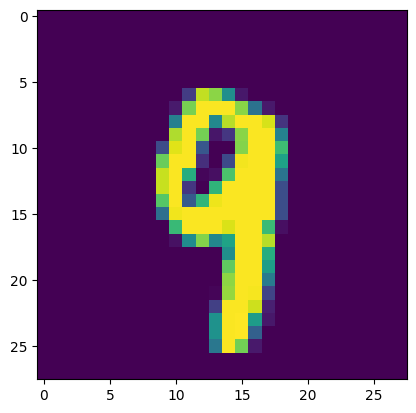

In [168]:
# Show the image 
plt.imshow(test_data[4143][0].reshape(28, 28))

In [169]:
# Pass de image thru our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4143][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [170]:
# Check the prediction ... get probabilities
new_prediction

tensor([[-1.7835e+01, -1.7456e+01, -2.0568e+01, -1.3224e+01, -9.2727e+00,
         -1.5168e+01, -2.8796e+01, -1.2151e+01, -1.1589e+01, -1.1050e-04]])

In [171]:
new_prediction.argmax()

tensor(9)

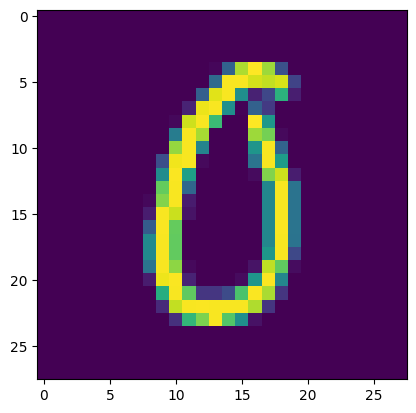

In [172]:
# Show the image 
plt.imshow(test_data[4146][0].reshape(28, 28))

In [180]:
# Pass de image thru our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4146][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [181]:
# Check the prediction ... get probabilities
new_prediction

tensor([[-9.4290e-05, -1.6580e+01, -1.7989e+01, -2.0540e+01, -1.4244e+01,
         -1.8114e+01, -1.2138e+01, -1.9298e+01, -1.0650e+01, -9.6485e+00]])

In [182]:
new_prediction.argmax()

tensor(0)

In [176]:
# Toma la imagen número 988 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[988] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [177]:
# Toma la imagen número 988 (o el elemento en la posición 1978) del conjunto de datos de prueba, test_data.
test_data[988][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [178]:
# Reorganiza el tensor de la imagen en una matriz de tamaño 28x28 para que sea más fácil de visualizar o manipular.
test_data[988][0].reshape(28, 28) # [0] es la primera parte de la tupla, que contiene el tensor de la imagen.

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

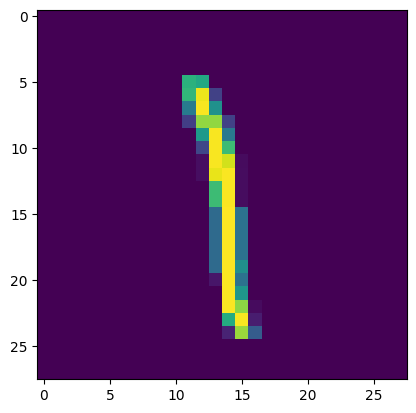

In [179]:
# Show the image 
plt.imshow(test_data[988][0].reshape(28, 28))

In [183]:
# Pass de image thru our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[988][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [184]:
# Check the prediction ... get probabilities
new_prediction

tensor([[-1.2355e+01, -5.9801e-04, -1.0629e+01, -1.3495e+01, -9.6271e+00,
         -1.0179e+01, -9.7933e+00, -9.5710e+00, -1.0580e+01, -8.0690e+00]])

In [185]:
new_prediction.argmax()

tensor(1)